In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load data

In [166]:
data = pd.read_csv('housing.csv')

# Câu 1: Thực hiện lại 7 yêu cầu trong phần hướng dẫn

## Yêu cầu 1

In [167]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_house_value', ylabel='Count'>

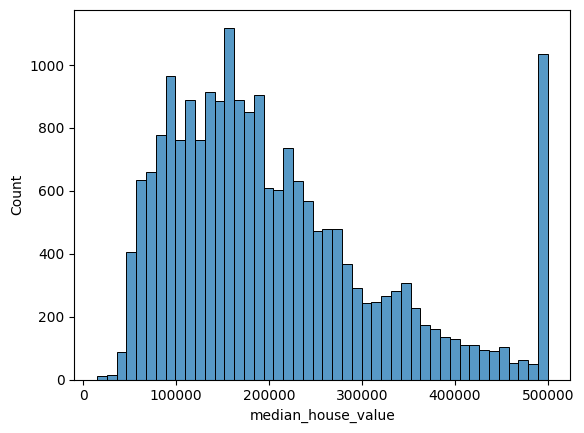

In [168]:
sns.histplot(data['median_house_value'])

* Biến mục tiêu có các thông số như sau
    * ***Max***: 500001$
    * ***Min***: 14999$
    * ***Mean***: 206855.816909$
    * ***Median***: 179700$
* Nhận xét: Dựa trên các thông số và biểu đồ, ta có thể thấy được rằng
    * Độ chênh lệch giữa hai giá trị là max và min là lớn, cụ thể là giá trị của max gấp 33 lần của min. Vì vậy để phù hợp cho huấn luyện mô hình cần sử dụng các kĩ thuật để scale lại dữ liệu
    * Ở biểu đồ, ta thấy được rằng, số lượng nhà ở phân khúc từ 200000$ nhỏ xuống chiếm phần lớn và ngược lại đối với số lượng nhà ở phân khúc trên 200000$, tuy nhiên đối với nhà có giá trị khoảng 500000$ lại có số lượng lớn

## Yêu cầu 2

In [169]:
print(f"Số lượng dòng: {len(data)}")
print("Các thuộc tính của dữ liệu")
print(data.columns)

Số lượng dòng: 20640
Các thuộc tính của dữ liệu
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


## Yêu cầu 3

In [170]:
print("Số lượng giá trị NA trong các thuộc tính")
print(data.isna().sum())

Số lượng giá trị NA trong các thuộc tính
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Yêu cầu 4

In [171]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [172]:
ocean_mapping = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
}
data['ocean_proximity'] = data['ocean_proximity'].map(ocean_mapping)

<Axes: >

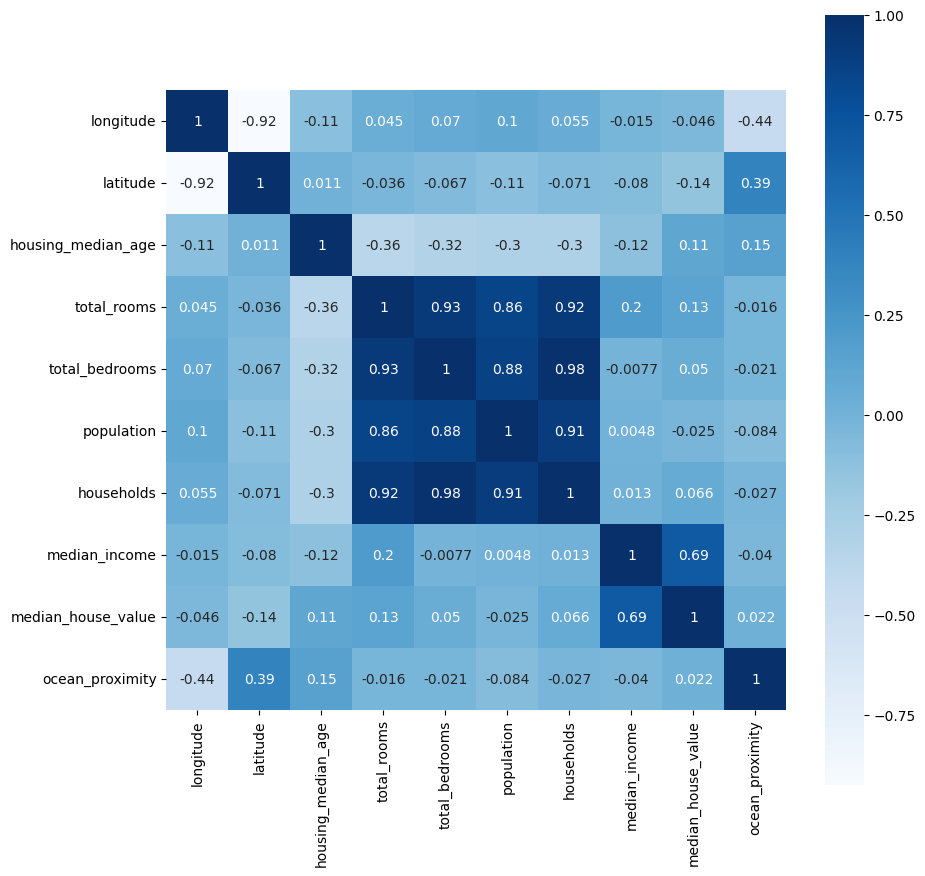

In [173]:
correlation = data.corr(method='pearson')

fig = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

* Dựa vào ma trận tương quan, ta thấy rằng thuộc tính "median_income" có mối tương quan mạnh nhất với "median_house_value" với hệ số là 0.69

## Yêu cầu 5

<Axes: xlabel='median_income', ylabel='median_house_value'>

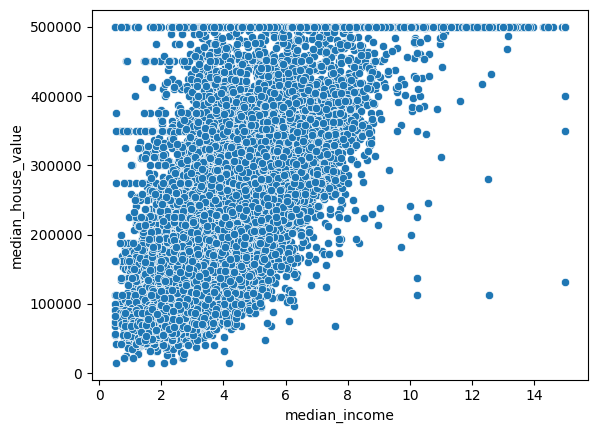

In [174]:
data_visualize = pd.DataFrame({'median_income': data['median_income'], 'median_house_value': data['median_house_value']})
sns.scatterplot(data=data_visualize, x='median_income', y='median_house_value')

## Yêu cầu 6

In [175]:
X = data['median_income']
y = data['median_house_value']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
print(f'Chiều của tập dữ liệu huấn luyện: {X_train.shape}')
print(f'Chiều của tập nhãn huấn luyện: {y_train.shape}')
print(f'Chiều của tập dữ liệu kiểm thử: {X_test.shape}')
print(f'Chiều của tập nhãn kiểm thử: {y_test.shape}')

Chiều của tập dữ liệu huấn luyện: (16512,)
Chiều của tập nhãn huấn luyện: (16512,)
Chiều của tập dữ liệu kiểm thử: (4128,)
Chiều của tập nhãn kiểm thử: (4128,)


## Yêu cầu 7

In [178]:
sc = MinMaxScaler(feature_range=(1, 50))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1, 1)).reshape(-1)

In [179]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train_transformed)

LinearRegression()

In [180]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [181]:
print(f'MSE: {mean_squared_error(y_test_transformed, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test_transformed, y_pred)}')

MSE: 72.38061171785664
RMSE: 8.507679573059661


<Axes: xlabel='median_income', ylabel='median_house_value'>

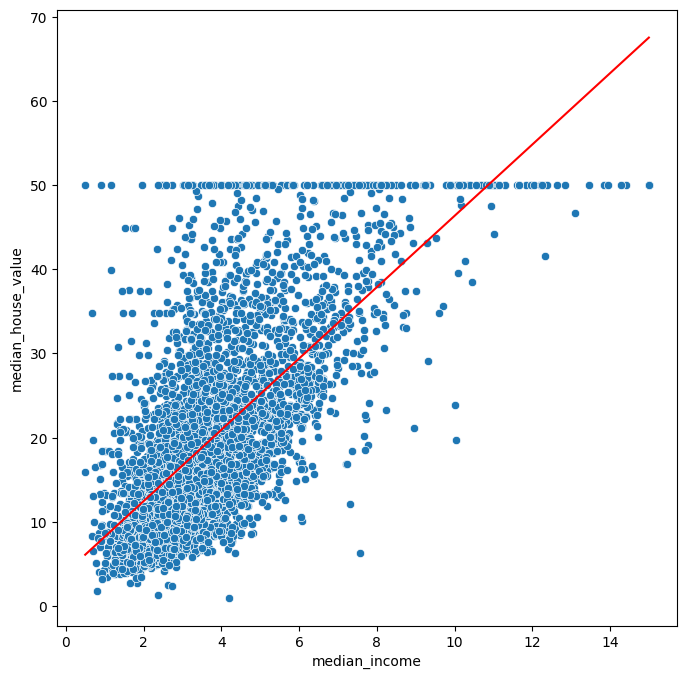

In [182]:
test_true = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_pred})

fig = plt.figure(figsize=(8, 8))

sns.lineplot(data=test_pred, x='median_income', y='median_house_value', color='r')
sns.scatterplot(data=test_true, x='median_income', y='median_house_value')

## Yêu cầu 8 - Cross Validation - n_splits=10

In [183]:
y_transformed = sc.fit_transform(y.values.reshape(-1, 1)).reshape(-1)

In [184]:
kf_10 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [185]:
avg_mse = []
for train_index, test_index in kf_10.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1, 1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1, 1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred)
    avg_mse.append(result)

In [186]:
np.mean(np.array(avg_mse))

72.03530701417034

# Câu 2: Thực hiện dự đoán giá nhà dựa vào thuộc tính total_bedrooms và sử dụng Cross Validation với n_splits=5

In [187]:
X_bd = data['total_bedrooms']
X_bd.isna().sum()

207

In [188]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_bd_processed = imp.fit_transform(X_bd.values.reshape(-1, 1))

kf_5 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [189]:
avg_mse_bd = []

for train_index, test_index in kf_5.split(X_bd_processed, y_transformed):
    X_train = X_bd_processed[train_index].reshape(-1, 1)
    y_train = y_transformed[train_index]

    X_test = X_bd_processed[test_index].reshape(-1, 1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse_bd.append(mse)

In [190]:
np.mean(np.array(avg_mse_bd))

135.1390307108083

* So sánh: 
    * Thuộc tính ***median_income*** với n_splits=10 cho ra giá trị MSE trung bình xấp xỉ 72.04
    * Thuộc tính ***total_bedrooms*** với n_splits=5 cho ra giá trị MSE trung bình xấp xỉ 135.14
* Nhận xét: Kết quả ở trên là hợp lý vì dựa trên mức độ tương quan của ***median_house_value"*** với các thuộc tính thì hệ số tương quan của của ***median_income*** cao hơn so với của ***"total_bedrooms"*** **(0.69 > 0.05)** nên giá trị MSE trung bình của ***median_income*** sẽ thấp hơn ***total_bedrooms***

# Câu 3: Kết hợp 2 thuộc tính là median_income và total_bedrooms lại với nhau. Sử dụng cross validation với n_splits=10

In [191]:
X_cb = data[['median_income', 'total_bedrooms']]
X_cb = imp.fit_transform(X_cb)

In [192]:
X_cb.shape

(20640, 2)

In [193]:
avg_mse_cb = []

for train_index, test_index in kf_10.split(X_cb, y_transformed):
    X_train = X_cb[train_index]
    y_train = y_transformed[train_index]

    X_test = X_cb[test_index]
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse_cb.append(mse)

In [194]:
np.mean(np.array(avg_mse_cb))

71.62322609370835

* Khi kết hợp 2 thuộc tính là ***median_income, total_bedrooms*** thì giá trị MSE trung bình xấp xỉ 71.62, thấp hơn giá trị MSE trung bình khi chỉ dùng ***median_income***

# Câu 4: Sử dụng Ridge Regression, nhận xét kết quả giữa Ridge và Linear

In [195]:
from sklearn.linear_model import Ridge

## Sử dụng thuộc tính ***median_income***

In [196]:
X = data['median_income']

In [197]:
avg_mse_ridge = []
for train_index, test_index in kf_10.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1, 1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1, 1)
    y_test = y_transformed[test_index]

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred)
    avg_mse_ridge.append(result)

In [198]:
np.mean(np.array(avg_mse_ridge))

72.03530107217058

## Sử dụng thuộc tính ***total_bedrooms***

In [199]:
avg_mse_bd_ridge = []

for train_index, test_index in kf_5.split(X_bd_processed, y_transformed):
    X_train = X_bd_processed[train_index].reshape(-1, 1)
    y_train = y_transformed[train_index]

    X_test = X_bd_processed[test_index].reshape(-1, 1)
    y_test = y_transformed[test_index]

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse_bd_ridge.append(mse)

In [200]:
np.mean(np.array(avg_mse_bd_ridge))

135.139030710794

## Sử dụng kết hợp ***median_income, total_bedrooms***

In [201]:
avg_mse_cb_ridge = []

for train_index, test_index in kf_10.split(X_cb, y_transformed):
    X_train = X_cb[train_index]
    y_train = y_transformed[train_index]

    X_test = X_cb[test_index]
    y_test = y_transformed[test_index]

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse_cb_ridge.append(mse)

In [202]:
np.mean(np.array(avg_mse_cb_ridge))

71.62321999366344

In [203]:
df = pd.DataFrame(
    {
        'Features': ['median_income', 'total_bedrooms', 'both'],
        'Linear': [np.mean(np.array(avg_mse)), np.mean(np.array(avg_mse_bd)), np.mean(np.array(avg_mse_cb))],
        'Ridge': [np.mean(np.array(avg_mse_ridge)), np.mean(np.array(avg_mse_bd_ridge)), np.mean(np.array(avg_mse_cb_ridge))]
    }
)
df

,Features,Linear,Ridge
0,median_income,72.035307,72.035301
1,total_bedrooms,135.139031,135.139031
2,both,71.623226,71.623220


* Nhận xét: Khi sử dụng Ridge (với alpha=1), giá trị MSE trung bình cho từng trường hợp sẽ thấp hơn khoảng 0.000006 so với giá trị MSE trung bình của Linear. Từ kết quả, cho thấy rằng hiệu suất của hai model Linear Regression và Ridge Regression không có quá nhiều sự thay đổi hay chênh lệch

# Câu 5: Sử dụng RandomForestRegressor kết hợp với GridSearchCV để tìm siêu tham số

In [204]:
rf = RandomForestRegressor(random_state=42) 

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}

## Thuộc tính median_income

In [205]:
X = data['median_income']
y = data['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [207]:
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1, 1)).reshape(-1)

In [208]:
grid_search.fit(X_train.values.reshape(-1, 1), y_train_transformed)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [209]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [210]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_pred, y_test_transformed)
print(f'MSE: {mse}')


MSE: 72.07067231323616


# Câu 6: Thực hiện tương tự cho bài toán hồi quy tìm ra mức chi trả điều trị y tế của một người dựa vào các đặc điểm về đời sống của họ

In [211]:
medical_data = pd.read_csv('insurance.csv')
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [212]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [213]:
MMS = MinMaxScaler(feature_range=(1, 50))

y = medical_data['charges']
y_transformed = MMS.fit_transform(y.values.reshape(-1, 1)).reshape(-1)
y_transformed

array([13.32892707,  1.4721616 ,  3.60264294, ...,  1.39729601,
        1.6930325 , 22.91518788])

In [214]:
medical_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [215]:
sex_mapping = {
    'male': 0,
    'female': 1
}
smoke_mapping = {
    'yes': 1,
    'no': 0
}
region_mapping = {
    'southeast': 1,
    'southwest': 2,
    'northwest': 3,
    'northeast': 4
}
medical_data['sex'] = medical_data['sex'].map(sex_mapping)
medical_data['smoker'] = medical_data['smoker'].map(smoke_mapping)
medical_data['region'] = medical_data['region'].map(region_mapping)

<Axes: >

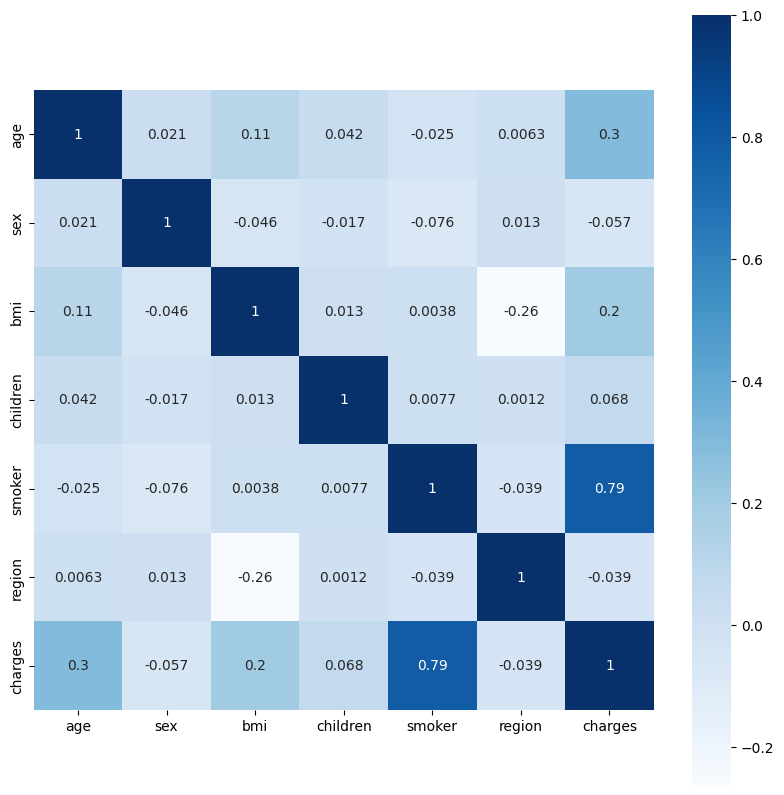

In [216]:
corr = medical_data.corr(method='pearson')

fig = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='Blues')

In [217]:
X = medical_data['smoker']

In [218]:
avg_mse = []

for train_index, test_index in kf_10.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1, 1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1, 1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse.append(mse)

In [219]:
np.mean(np.array(avg_mse))

33.70998651246373

In [220]:
X_cb = medical_data[['age', 'smoker']]

In [221]:
avg_mse = []

for train_index, test_index in kf_10.split(X_cb, y_transformed):
    X_train = X_cb.values[train_index]
    y_train = y_transformed[train_index]

    X_test = X_cb.values[test_index]
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse.append(mse)

In [222]:
np.mean(np.array(avg_mse))

24.684958742754027

In [223]:
X_cb = medical_data[['age', 'bmi', 'smoker']]
X_cb.shape

(1338, 3)

In [224]:
avg_mse = []

for train_index, test_index in kf_10.split(X_cb, y_transformed):
    X_train = X_cb.values[train_index]
    y_train = y_transformed[train_index]

    X_test = X_cb.values[test_index]
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    avg_mse.append(mse)

In [225]:
np.mean(np.array(avg_mse))

22.052641094656394

* Nhận xét: Ở bộ dữ liệu này, biến mục tiêu là charges, dựa vào ma trận tương quan, ta thấy được rằng các thuộc tính như *age*, *bmi* và *smoker* có độ tương quan cao đối với biến mục tiêu
    * Khi chỉ sử dụng thuộc tính *smoker*, giá trị MSE trung bình là 33.70998651246373
    * Khi kết hợp hai thuộc tính là *smoker, age*, giá trị MSE trung bình là 24.684958742754027
    * Khi kết hợp cả 3 thuộc tính nêu trên thì giá trị MSE trung bình là 22.052641094656394